In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
df_HR = pd.read_csv('../data/002/HR_002.csv', parse_dates=['datetime'])

#remove whitespace from column names
df_HR.columns = df_HR.columns.str.strip()

# Display the first few rows
df_HR.head()

,datetime,hr
0,2020-02-21 09:19:16,58.00
1,2020-02-21 09:19:17,58.50
2,2020-02-21 09:19:18,56.33
3,2020-02-21 09:19:19,60.50
4,2020-02-21 09:19:20,73.20


In [16]:
# Load the CSV file into a DataFrame
df_TEMP = pd.read_csv('../data/002/TEMP_002.csv', parse_dates=['datetime'])

#remove whitespace from column names
df_TEMP.columns = df_TEMP.columns.str.strip()

# Display the first few rows
df_TEMP.head()

,datetime,temp
0,2020-02-21 09:19:06.000,32.91
1,2020-02-21 09:19:06.250,32.91
2,2020-02-21 09:19:06.500,32.91
3,2020-02-21 09:19:06.750,32.91
4,2020-02-21 09:19:07.000,32.91


In [7]:
import pandas as pd

# Load the full CSV
df = pd.read_csv('../data/002/Dexcom_002.csv')

# Filter for glucose events (Event Type == 'EGV')
df_egv = df[df['Event Type'] == 'EGV'].copy()

# Convert timestamp to datetime format
df_egv['Timestamp (YYYY-MM-DDThh:mm:ss)'] = pd.to_datetime(df_egv['Timestamp (YYYY-MM-DDThh:mm:ss)'])

# Rename columns for clarity
df_egv.rename(columns={
    'Timestamp (YYYY-MM-DDThh:mm:ss)': 'timestamp',
    'Glucose Value (mg/dL)': 'glucose',
}, inplace=True)

# Keep only relevant columns
df_egv = df_egv[['timestamp', 'glucose']].reset_index(drop=True)

# Preview result
print(df_egv.head())


            timestamp  glucose
0 2020-02-21 11:08:36    186.0
1 2020-02-21 11:13:36    181.0
2 2020-02-21 11:18:36    175.0
3 2020-02-21 11:23:35    168.0
4 2020-02-21 11:28:36    163.0


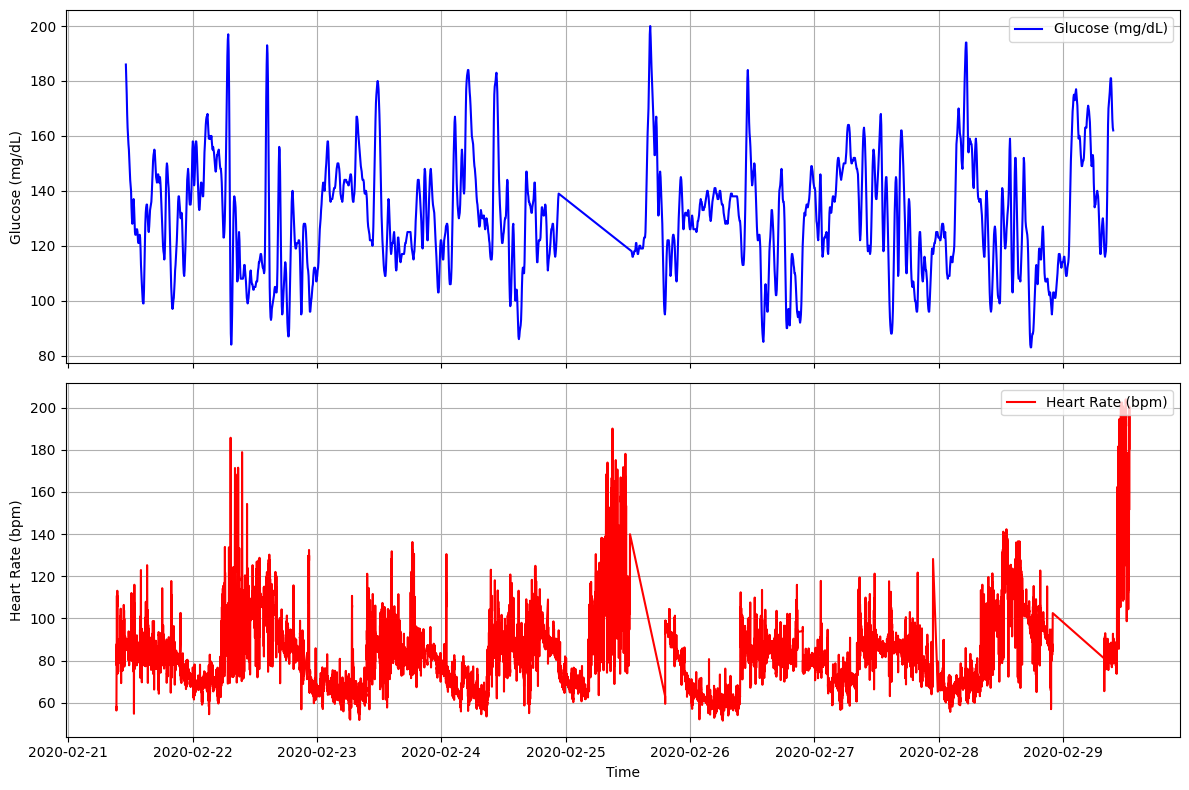

In [15]:
import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Plot df_egv
axes[0].plot(df_egv['timestamp'], df_egv['glucose'], label='Glucose (mg/dL)', color='blue')
axes[0].set_ylabel('Glucose (mg/dL)')
axes[0].legend(loc='upper right')
axes[0].grid()

# Plot df_HR
axes[1].plot(df_HR['datetime'], df_HR['hr'], label='Heart Rate (bpm)', color='red')
axes[1].set_ylabel('Heart Rate (bpm)')
axes[1].set_xlabel('Time')
axes[1].legend(loc='upper right')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

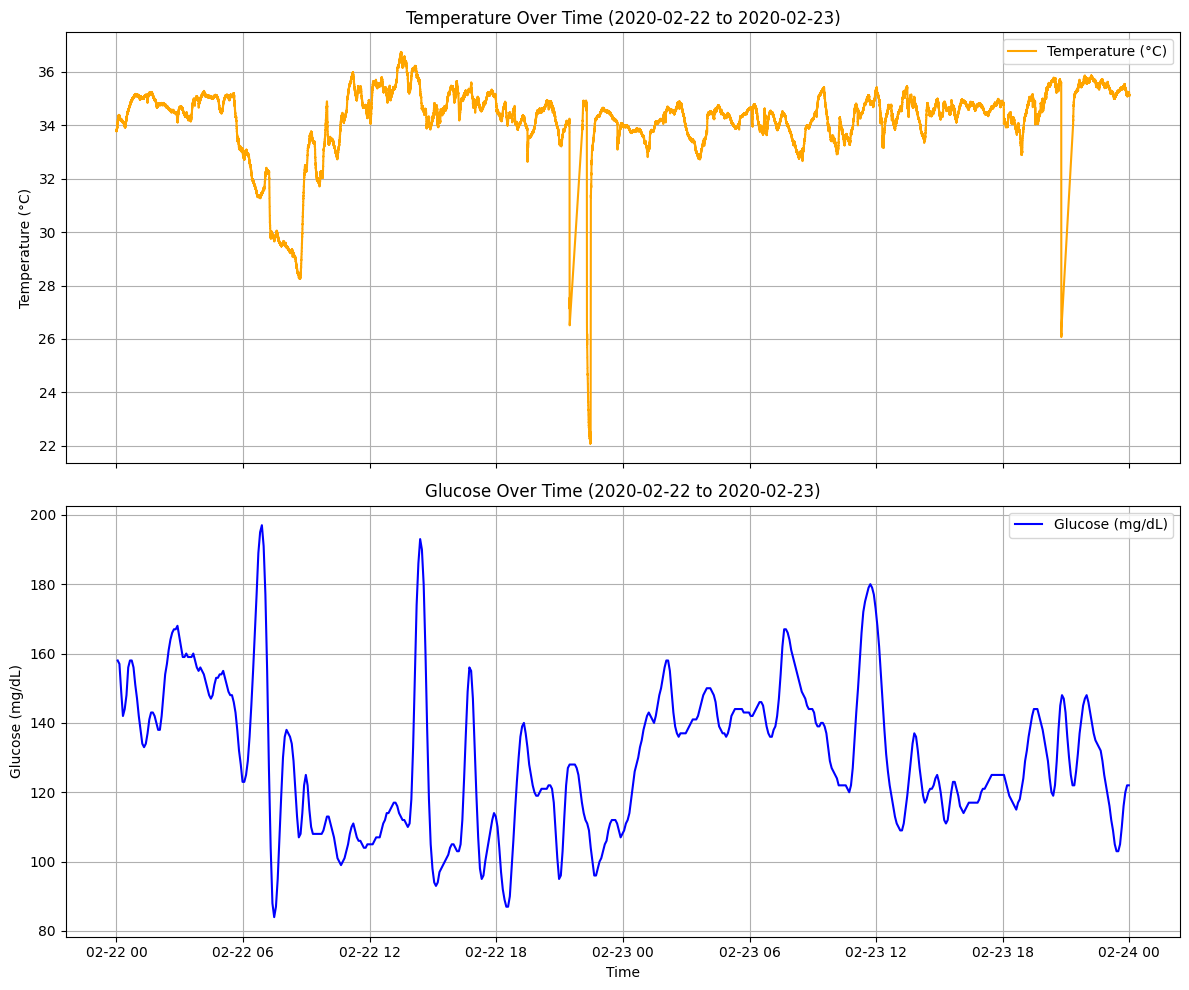

In [25]:
# Filter df_TEMP for the specified date range
df_TEMP_filtered = df_TEMP[(df_TEMP['datetime'] >= '2020-02-22') & (df_TEMP['datetime'] <= '2020-02-24')]

# Filter df_egv for the specified date range
df_egv_filtered = df_egv[(df_egv['timestamp'] >= '2020-02-22') & (df_egv['timestamp'] <= '2020-02-24')]

# Create a figure and two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot filtered df_TEMP on the first subplot
axes[0].plot(df_TEMP_filtered['datetime'], df_TEMP_filtered['temp'], label='Temperature (°C)', color='orange')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature Over Time (2020-02-22 to 2020-02-23)')
axes[0].legend(loc='upper right')
axes[0].grid()

# Plot filtered df_egv on the second subplot
axes[1].plot(df_egv_filtered['timestamp'], df_egv_filtered['glucose'], label='Glucose (mg/dL)', color='blue')
axes[1].set_ylabel('Glucose (mg/dL)')
axes[1].set_xlabel('Time')
axes[1].set_title('Glucose Over Time (2020-02-22 to 2020-02-23)')
axes[1].legend(loc='upper right')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

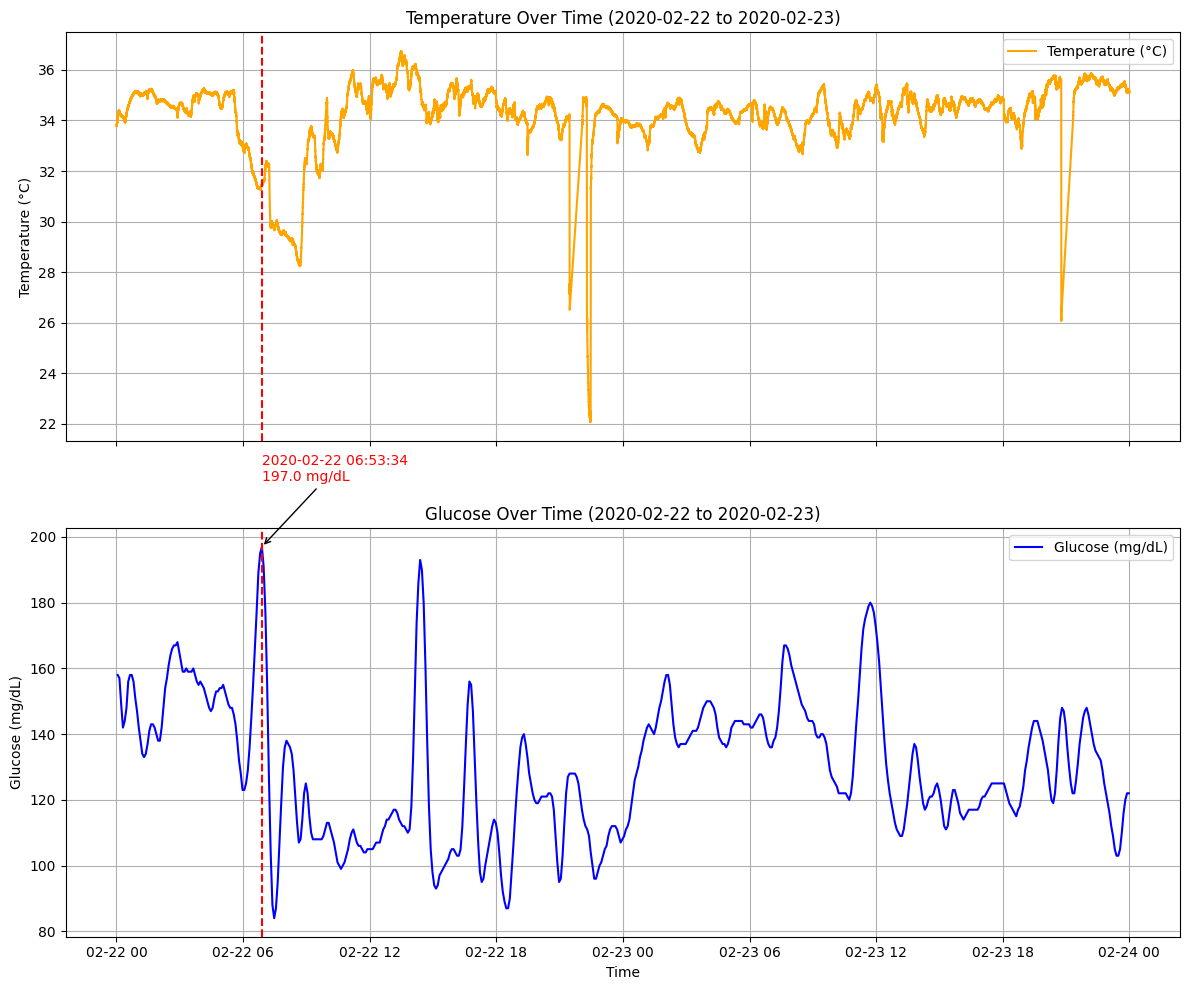

In [26]:
# Find the maximum glucose value and its corresponding timestamp
max_glucose = df_egv_filtered['glucose'].max()
max_glucose_time = df_egv_filtered[df_egv_filtered['glucose'] == max_glucose]['timestamp'].iloc[0]

# Create a figure and two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot filtered df_TEMP on the first subplot
axes[0].plot(df_TEMP_filtered['datetime'], df_TEMP_filtered['temp'], label='Temperature (°C)', color='orange')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature Over Time (2020-02-22 to 2020-02-23)')
axes[0].legend(loc='upper right')
axes[0].grid()

# Plot filtered df_egv on the second subplot
axes[1].plot(df_egv_filtered['timestamp'], df_egv_filtered['glucose'], label='Glucose (mg/dL)', color='blue')
axes[1].set_ylabel('Glucose (mg/dL)')
axes[1].set_xlabel('Time')
axes[1].set_title('Glucose Over Time (2020-02-22 to 2020-02-23)')
axes[1].legend(loc='upper right')
axes[1].grid()

# Add a vertical line and annotation for the maximum glucose value
for ax in axes:
    ax.axvline(x=max_glucose_time, color='red', linestyle='--', label='Max Glucose Spike')
axes[1].annotate(f'{max_glucose_time}\n{max_glucose} mg/dL',
                 xy=(max_glucose_time, max_glucose),
                 xytext=(max_glucose_time, max_glucose + 20),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10,
                 color='red')

# Adjust layout
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

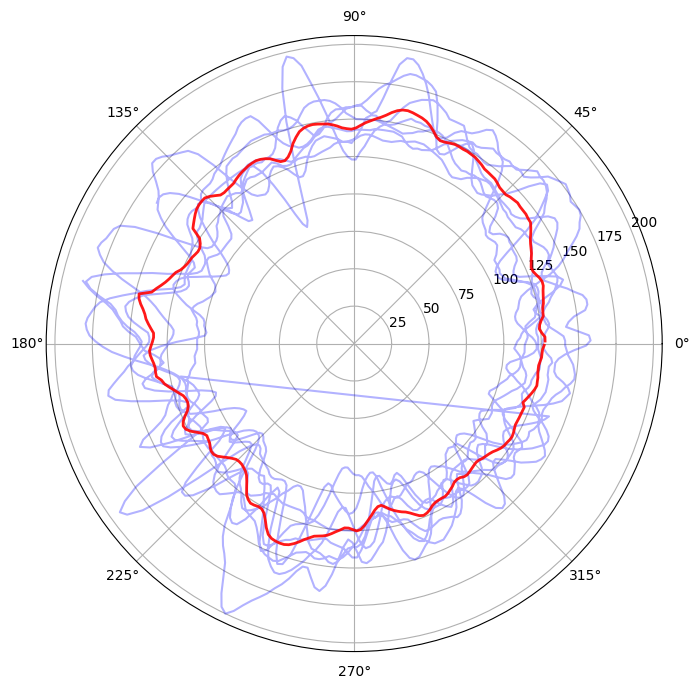

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Extract hour of the day and glucose levels
df_egv['hour'] = df_egv['timestamp'].dt.hour + df_egv['timestamp'].dt.minute / 60
df_egv['radian'] = (df_egv['hour'] / 24) * 2 * np.pi

# Create the radial plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
# Plot the glucose levels with lighter lines
ax.plot(df_egv['radian'], df_egv['glucose'], alpha=0.3, color='blue', label='Glucose Levels')

# Calculate the mean glucose levels grouped by the hour
mean_glucose_by_hour = df_egv.groupby('hour')['glucose'].mean()

# Convert the hour to radians for plotting
mean_glucose_radian = (mean_glucose_by_hour.index / 24) * 2 * np.pi

# Plot the mean glucose levels
ax.plot(mean_glucose_radian, mean_glucose_by_hour, alpha=0.9, color='red', label='Mean Glucose Levels', linewidth=2)

# Plot mean of the entire data set too
mean_glucose_lsit = [df_egv['glucose'].mean()]*100
mean_glucose_radian_const = np.linspace(0, 2 * np.pi, 100)
ax.plot(mean_glucose_radian_const, mean_glucose_lsit, color='green', linestyle='--', label=f'Mean Glucose: {mean_glucose:.2f} mg/dL')

# Customize the plot
ax.set_theta_zero_location('N')  # Set 0 hours at the top
ax.set_theta_direction(-1)       # Set clockwise direction
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))  # Hour ticks
ax.set_xticklabels([f'{i}:00' for i in range(24)])  # Hour labels
ax.set_title('Radial Plot of Glucose Levels', va='bottom')
ax.set_ylabel('Glucose (mg/dL)', labelpad=20)
ax.legend(loc='upper right')

plt.show()

In [31]:
mean_glucose

np.float64(130.43322321849928)